In [6]:
with open('./data/input_08.txt') as fh:
    file_input = fh.read().strip()

pixels = [int(p) for p in file_input]


In [9]:
import numpy as np

In [23]:
test = [int(d) for d in '123456789012']
test = np.array(test)
test = test.reshape((2, 2, 3))
test[0, : , :], test[1, :, :]

(array([[1, 2, 3],
        [4, 5, 6]]), array([[7, 8, 9],
        [0, 1, 2]]))

In [24]:
dimx = 25
dimy = 6
dimz = len(pixels) // (dimx * dimy) 

pixels = np.array(pixels)
pixels = pixels.reshape((dimz, dimy, dimx))
zero = pixels == 0

In [53]:
# part 1
min_layer = np.argmin(zero.sum(axis=-1).sum(axis=-1))
num_ones = (pixels[min_layer, :, :] == 1).sum()
num_twos = sum(pixels[min_layer, :, :] == 2).sum()
print (num_ones * num_twos)

2125


In [71]:
image = np.zeros((dimy, dimx))
mask = np.zeros((dimy, dimx))
mask = mask == 1
for i in range(dimz):
    this_layer = pixels[i, :, :]
    not_translucent = (this_layer != 2)
    paint = not_translucent & ~mask
    
    image[paint] = this_layer[paint]
    mask = mask | paint
    

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

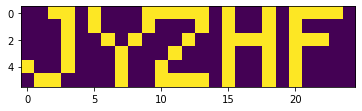

In [77]:
plt.imshow(image)